In [1]:
import pandas as pd
from scipy.spatial import Voronoi, voronoi_plot_2d, ConvexHull
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('data.csv',header=None)

In [14]:
a = np.array([])
for i, row in df.iterrows():
    print(len(row))
    a = np.array(row)
    print(a)
    break

np.where(np.isnan(a))

23
[-0.00000000e+00 -0.00000000e+00 -3.99998999e+03  1.79400000e-03
 -1.99990100e+03  1.00001672e+03 -1.99990076e+03 -9.99983398e+02
 -4.99901093e+02  1.50001672e+03 -4.99900848e+02 -1.49998328e+03
             nan  3.99990112e+03 -1.64680000e-02  1.99990100e+03
 -1.00001660e+03  1.99990076e+03  9.99983337e+02  9.99901123e+02
 -2.00001685e+03  9.99900757e+02  1.99998328e+03]


(array([12]),)

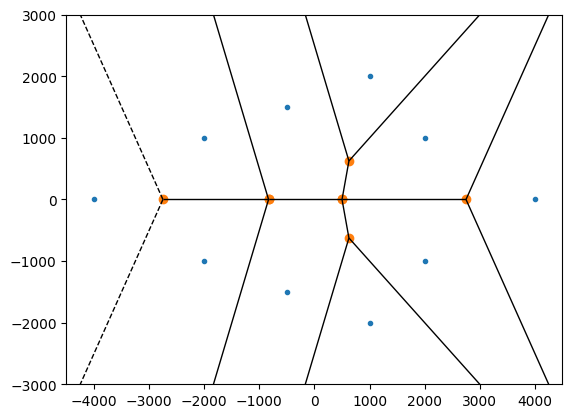

In [3]:
vor = Voronoi(points)
voronoi_plot_2d(vor)
plt.xlim(-4500,4500)
plt.ylim(-3000,3000)
plt.show()

In [6]:
def area(points):
    v = Voronoi(points)
    vol = np.zeros(v.npoints)
    for i, reg_num in enumerate(v.point_region):
        indices = v.regions[reg_num]
        if -1 in indices: # some regions can be opened
            vol[i] = np.inf
        else:
            vol[i] = ConvexHull(v.vertices[indices]).volume
    return vol

In [7]:
areas = area(points)
print(areas)

[           inf            inf            inf 6.39484965e+10
 2.08997416e+10            inf 7.40618578e+06 7.40620603e+06
            inf            inf]


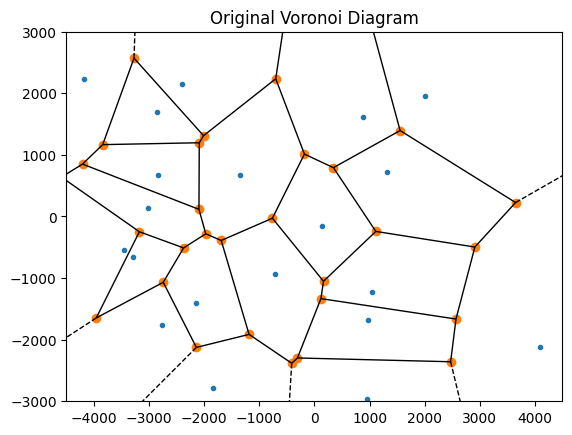

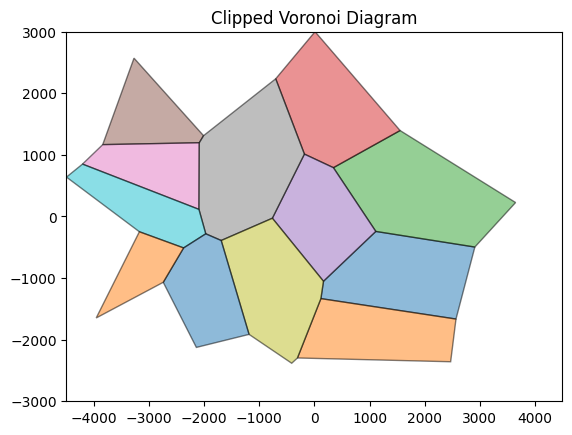

In [11]:
def generate_points_in_rect(n_points, rect):
    min_x, max_x, min_y, max_y = rect
    points = []
    while len(points) < n_points:
        x = np.random.uniform(min_x, max_x)
        y = np.random.uniform(min_y, max_y)
        points.append([x, y])
    return np.array(points)

def clip_voronoi_to_rect(voronoi, rect):
    min_x, max_x, min_y, max_y = rect
    clipped_vertices = []
    for region in voronoi.regions:
        if not -1 in region:
            polygon = [voronoi.vertices[i] for i in region]
            clipped_polygon = []
            for i in range(len(polygon)):
                x1, y1 = polygon[i]
                x2, y2 = polygon[(i + 1) % len(polygon)]
                clipped_x1 = max(min(x1, max_x), min_x)
                clipped_y1 = max(min(y1, max_y), min_y)
                clipped_x2 = max(min(x2, max_x), min_x)
                clipped_y2 = max(min(y2, max_y), min_y)
                if clipped_x1 != clipped_x2 or clipped_y1 != clipped_y2:
                    clipped_polygon.append([clipped_x1, clipped_y1])
                if (clipped_x1 < max_x and clipped_y1 < max_y) or (clipped_x2 < max_x and clipped_y2 < max_y):
                    clipped_polygon.append([clipped_x2, clipped_y2])
            clipped_vertices.append(clipped_polygon)
    return clipped_vertices

# Define rectangular region
rect = (-4500, 4500, -3000, 3000)

# Generate random points within the rectangular region
points = generate_points_in_rect(20, rect)

# Compute Voronoi diagram
vor = Voronoi(points)

# Clip Voronoi diagram to rectangular region
clipped_vertices = clip_voronoi_to_rect(vor, rect)

# Plot original Voronoi diagram
voronoi_plot_2d(vor)
plt.xlim(-4500, 4500)
plt.ylim(-3000, 3000)
plt.title('Original Voronoi Diagram')
plt.show()

# Plot clipped Voronoi diagram
plt.figure()
for clipped_polygon in clipped_vertices:
    plt.fill(*zip(*clipped_polygon), edgecolor='black', alpha=0.5)
plt.xlim(-4500, 4500)
plt.ylim(-3000, 3000)
plt.title('Clipped Voronoi Diagram')
plt.show()

GEOMETRYCOLLECTION (POLYGON ((0.5 0.5, 0.5 2, 2 2, 2 0.5, 0.5 0.5)), POLYGON ((0.5 -2, 0.5 0.5, 2 0.5, 2 -2, 0.5 -2)), POLYGON ((-2 0.5, -2 2, 0.5 2, 0.5 0.5, -2 0.5)), POLYGON ((-2 -2, -2 0.5, 0.5 0.5, 0.5 -2, -2 -2)))
2.25
3.75
3.75
6.25
POINT (0 0)
POINT (1 0)
POINT (1 1)
POINT (0 1)


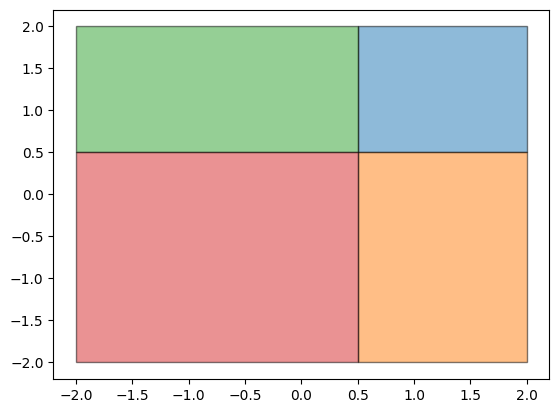

In [23]:
from shapely.geometry import Polygon
from shapely import Point, voronoi_polygons, MultiPoint, normalize

x_min = -2
x_max = 2
y_min = -2
y_max = 2

boundary = Polygon([(x_min, y_min), (x_max, y_min), (x_max, y_max), (x_min, y_max)])

points = MultiPoint([(0,0), (1,0), (1,1), (0,1)])
result = (normalize(voronoi_polygons(points, extend_to=boundary)))
print(result)

for polygon in result.geoms:
    plt.fill(*zip(*polygon.exterior.coords), edgecolor='black', alpha=0.5)
    print(polygon.area)

for point in points.geoms:
    print(point)

